## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16], do_dropout=False, do_batchnormalize=False):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(units=n, name="hidden_layer%d" % (idx))(input_layer)
        else:
            x = keras.layers.Dense(units=n, name="hidden_layer%d" % (idx))(x)
            
        if do_batchnormalize:
            x = keras.layers.BatchNormalization()(x)
            
        x = keras.layers.Activation("relu")(x)
        
        if do_dropout:
            x = keras.layers.Dropout(rate=0.25)(x)
        
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-2
MOMENTUM=0.95
DROPOUT = [True, False]
BATCHNORMALIZE = [True, False]
EPOCHS = 20
BATCH_SIZE=256

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for do_dropout in DROPOUT:
    for do_batchnormalize in BATCHNORMALIZE:
        keras.backend.clear_session()
        print("Experiment with dropout: %s, batch_normalize: %s" % (do_dropout, do_batchnormalize))
        model = build_mlp(x_train.shape[1:], do_dropout=do_dropout, do_batchnormalize=do_batchnormalize)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test),
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "drop-%s-bn-%s" % (do_dropout, do_batchnormalize)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with dropout: True, batch_normalize: True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (

50000/50000 [==============================] - 2s 39us/step - loss: 1.8757 - acc: 0.3037 - val_loss: 1.7747 - val_acc: 0.3651
Epoch 9/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.8704 - acc: 0.3080 - val_loss: 1.7640 - val_acc: 0.3658
Epoch 10/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.8658 - acc: 0.3112 - val_loss: 1.7600 - val_acc: 0.3731
Epoch 11/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.8530 - acc: 0.3142 - val_loss: 1.7347 - val_acc: 0.3846
Epoch 12/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.8486 - acc: 0.3189 - val_loss: 1.7337 - val_acc: 0.3808
Epoch 13/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.8364 - acc: 0.3217 - val_loss: 1.7249 - val_acc: 0.3803
Epoch 14/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.8332 - acc: 0.3226 - val_loss: 1.7257 - val_acc: 0.3807
Epoch 15/20
50000/50000 [======================

Epoch 3/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.6366 - acc: 0.4135 - val_loss: 1.6742 - val_acc: 0.3908
Epoch 4/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.5780 - acc: 0.4337 - val_loss: 1.5713 - val_acc: 0.4333
Epoch 5/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.5380 - acc: 0.4476 - val_loss: 1.5483 - val_acc: 0.4428
Epoch 6/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.5084 - acc: 0.4584 - val_loss: 1.6018 - val_acc: 0.4309
Epoch 7/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.4822 - acc: 0.4677 - val_loss: 1.5187 - val_acc: 0.4572
Epoch 8/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.4605 - acc: 0.4766 - val_loss: 1.4920 - val_acc: 0.4640
Epoch 9/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.4389 - acc: 0.4837 - val_loss: 1.4905 - val_acc: 0.4715
Epoch 10/20
50000/50000 [================

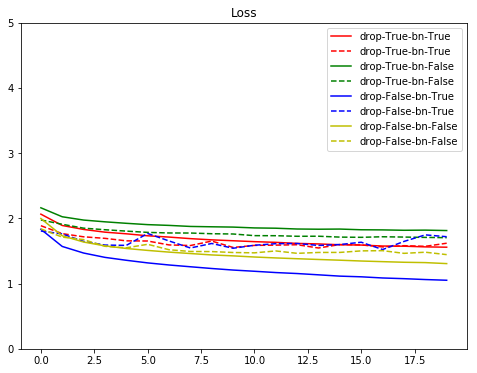

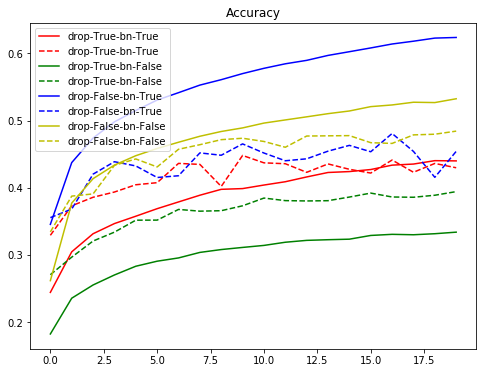

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()